# [E-Commerce Public Dataset Data Analysis project]
- **Nama:** [Benedict Raditya Pradipta Ginting]
- **Email:** [ginting.youth@gmail.com]
- **ID Dicoding:** [benedict-rpg]

## Menentukan Pertanyaan Bisnis

- Kategori produk mana yang menghasilkan penjualan terbanyak dan memberikan ulasan terbaik?
- Bagaimana cara mengidentifikasi pelanggan yang paling berharga (VIP) berdasarkan perilaku pembelian mereka?
- Apakah murahnya suatu produk mempengaruhi larisnya suatu produk?

## Import Semua Packages/Library yang Digunakan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip "/content/drive/MyDrive/Dataset/E-commerce-public-dataset.zip"

Mounted at /content/drive
Archive:  /content/drive/MyDrive/Dataset/E-commerce-public-dataset.zip
  inflating: E-Commerce Public Dataset/customers_dataset.csv  
  inflating: E-Commerce Public Dataset/geolocation_dataset.csv  
 extracting: E-Commerce Public Dataset/New Text Document.txt  
  inflating: E-Commerce Public Dataset/order_items_dataset.csv  
  inflating: E-Commerce Public Dataset/order_payments_dataset.csv  
  inflating: E-Commerce Public Dataset/order_reviews_dataset.csv  
  inflating: E-Commerce Public Dataset/orders_dataset.csv  
  inflating: E-Commerce Public Dataset/product_category_name_translation.csv  
  inflating: E-Commerce Public Dataset/products_dataset.csv  
  inflating: E-Commerce Public Dataset/sellers_dataset.csv  


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as mp
import pandas as pd

## Data Wrangling

### Gathering Data

In [ ]:
order_df = pd.read_csv("/content/E-Commerce Public Dataset/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
customers_df = pd.read_csv("/content/E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geo_df = pd.read_csv("/content/E-Commerce Public Dataset/geolocation_dataset.csv")
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
order_items_df = pd.read_csv("/content/E-Commerce Public Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_pay_df = pd.read_csv("/content/E-Commerce Public Dataset/order_payments_dataset.csv")
order_pay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_rev_df = pd.read_csv("/content/E-Commerce Public Dataset/order_reviews_dataset.csv")
order_rev_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
category_df = pd.read_csv("/content/E-Commerce Public Dataset/product_category_name_translation.csv")
category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
product_df = pd.read_csv("/content/E-Commerce Public Dataset/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers_df = pd.read_csv("/content/E-Commerce Public Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [ ]:
print('\n', customers_df.info())
print('\n', geo_df.info())
print('\n', order_items_df.info())
print('\n', order_pay_df.info())
print('\n', order_rev_df.info())
print('\n', order_df.info())
print('\n', product_df.info())
print('\n', category_df.info())
print('\n', sellers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

Melihat apakah ada data null pada setiap dataframe

In [ ]:
print("\nBerapa banyak missing values pada customers: ",customers_df.isna().sum())
print("\nBerapa banyak missing values pada geolocation: ",geo_df.isna().sum())
print("\nBerapa banyak missing values pada order items: ",order_items_df.isna().sum())
print("\nBerapa banyak missing values pada order payments: ",order_pay_df.isna().sum())
print("\nBerapa banyak missing values pada order reviews: ",order_rev_df.isna().sum())
print("\nBerapa banyak missing values pada orders: ",order_df.isna().sum())
print("\nBerapa banyak missing values pada product Category: ",category_df.isna().sum())
print("\nBerapa banyak missing values pada products: ",product_df.isna().sum())
print("\nBerapa banyak missing values pada sellers: ",sellers_df.isna().sum())


Berapa banyak missing values pada customers:  customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Berapa banyak missing values pada geolocation:  geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Berapa banyak missing values pada order items:  order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Berapa banyak missing values pada order payments:  order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Berapa banyak missing values pada order reviews:  review_id                      0
order_id                       0
review_score  

Melihat apakah ada data duplikat dari tiap tiap data frame



In [ ]:
print("\nBerapa banyak data duplikat pada customers: ",customers_df.duplicated().sum())
print("\nBerapa banyak data duplikat pada geolocation: ",geo_df.duplicated().sum())
print("\nBerapa banyak data duplikat pada order items: ",order_items_df.duplicated().sum())
print("\nBerapa banyak data duplikat pada order payments: ",order_pay_df.duplicated().sum())
print("\nBerapa banyak data duplikat pada order reviews: ",order_rev_df.duplicated().sum())
print("\nBerapa banyak data duplikat pada orders: ",order_df.duplicated().sum())
print("\nBerapa banyak data duplikat pada product Category: ",category_df.duplicated().sum())
print("\nBerapa banyak data duplikat pada products: ",product_df.duplicated().sum())
print("\nBerapa banyak data duplikat pada sellers: ",sellers_df.duplicated().sum())


Berapa banyak data duplikat pada customers:  0

Berapa banyak data duplikat pada geolocation:  261831

Berapa banyak data duplikat pada order items:  0

Berapa banyak data duplikat pada order payments:  0

Berapa banyak data duplikat pada order reviews:  0

Berapa banyak data duplikat pada orders:  0

Berapa banyak data duplikat pada product Category:  0

Berapa banyak data duplikat pada products:  0

Berapa banyak data duplikat pada sellers:  0


**Insight:**
- Ada Beberapa missing values pada order_review.df, order_df,product_df
- Pada beberapa kesalahan tipe data seperti pada data frame order,review, dan juga items
- Ada data data yang duplikat di geolocation_df

### Cleaning Data

Menghilangkan Duplikasi

In [ ]:
# missvalues= ['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']
product_df[product_df['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
product_df.dropna(inplace=True) #Setelah saya lihat, semua NaN pada product_df ada pada baris yang sama,

In [ ]:
order_rev_df[order_rev_df['review_comment_message'].isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [ ]:
order_rev_df.fillna(value='no comment',inplace = True)

In [ ]:
WrongDataTypes1 = ["order_purchase_timestamp","order_delivered_carrier_date","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for WrongDataType in WrongDataTypes1:
  order_df[WrongDataType] = pd.to_datetime(order_df[WrongDataType])

In [ ]:
WrongDataTypes2 = ["review_creation_date","review_answer_timestamp"]

for WrongDataType in WrongDataTypes2:
  order_rev_df[WrongDataType] = pd.to_datetime(order_rev_df[WrongDataType])

In [ ]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [ ]:
geo_df.to_csv("geo_df.csv",index=False)

**Insight:**
- Duplikat pada geolocation sepertinya lebih baik untuk tidak di drop, karena mungkin duplikatnya terdapat di geolocation city dan geolocation state
- Missing values pada order_df pun lebih baik tidak perlu dihilangkan atau diganti, karena itu menunjukkan produk belum diproses lebih lanjut
-Missing values pada product_df kebanyakan berada di baris yang sama, dan hal pentingnya tertutup oleh banyaknya NaN, maka saya melakukan drop pada missing values
-kesalahan tipe data pada tiap data frame sudah dibenarkan

## Exploratory Data Analysis (EDA)

### Explore Category

In [ ]:
category_df.sample(5)

,product_category_name,product_category_name_english
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
23,malas_acessorios,luggage_accessories
38,moveis_colchao_e_estofado,furniture_mattress_and_upholstery
34,artigos_de_festas,party_supplies
45,alimentos,food


In [ ]:
order_rev_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
60120,5ef12323d21c072cfac0a47601aba931,f4bcc27cc1e629c8ea22ae96ab8751ae,1,no comment,O produto não chegou no prazo prometido.,2018-03-18,2018-03-18 04:28:02
81546,401bb2107937f988b19d6e776abeb259,8bf34e270470d172db01882f498e9162,1,no comment,Houve avaria na embalagem. O produto foi para ...,2018-01-05,2018-01-07 10:42:48
43078,e225700ab0d2bbedf275ae61b6795527,079b79bacc6e0a0c7ed93cd6e3624f6e,5,no comment,Produto veio certinho. Tudo ok,2017-08-15,2017-08-15 23:39:33
47817,21e2b0fb9ca761b7fdad9bebbc4fe2b6,707029282a0541fda1572e968b5d35b2,5,no comment,no comment,2017-11-28,2017-11-29 19:14:54
75788,f6fca12a2dae92684fefd38a8fe4d2a6,dbae123b07ca4baf09ee93c5b52c8932,5,no comment,no comment,2018-02-09,2018-02-12 01:50:42


explore order_rev_df

In [ ]:
order_rev_df.groupby(by="review_score").agg({
    "review_id" : "nunique"
})

,review_id
review_score,
1,11282
2,3114
3,8097
4,19007
5,56910


In [ ]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
98823,e02da1929daa15fa492dc605bdad4896,1,094e4f4d501b5a6ec753b60a940b069b,14d7985702e72162bbf13b6beb74ab2b,2018-06-26 15:00:01,89.00,16.81
76061,ad286e926f0a816e7b604bd0c9db8b1c,1,4413a608a42bd21bbf9d5abbd58c249a,7ddcbb64b5bc1ef36ca8c151f6ec77df,2017-12-11 04:12:09,166.99,16.80
92202,d139bb03af910e29eab280ed63bec613,1,c18ab1f0dc1937464d516ca610408e26,e9779976487b77c6d4ac45f75ec7afe9,2018-08-29 03:10:23,18.49,18.23
101810,e7126a85c2b327968a0ad83a82b75442,1,1a28b6d0eb91221f9b752c533f9e0182,1430239a858e7682bbc43b20758af153,2017-12-14 20:57:29,19.90,7.78
40372,5be92ef6cf4a42ece07ad8bc3c00c70b,2,2b4662eb979b4254e70b334e76ba0470,c33847515fa6305ce6feb1e818569f13,2018-06-27 03:17:52,129.00,21.72


explore order_items_df

In [ ]:
order_items_df.groupby(by="product_id").agg({
    "order_id":"nunique",
    "price":"max"
})

,order_id,price
product_id,,
00066f42aeeb9f3007548bb9d3f33c38,1,101.65
00088930e925c41fd95ebfe695fd2655,1,129.90
0009406fd7479715e4bef61dd91f2462,1,229.00
000b8f95fcb9e0096488278317764d19,2,58.90
000d9be29b5207b54e86aa1b1ac54872,1,199.00
...,...,...
fff6177642830a9a94a0f2cba5e476d1,2,119.99
fff81cc3158d2725c0655ab9ba0f712c,1,90.00
fff9553ac224cec9d15d49f5a263411f,1,32.00


In [ ]:
product_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
15105,735bfbf42adf674ab05553909b0b92af,bebes,35.0,964.0,1.0,170.0,19.0,12.0,14.0
27885,d0b37eae654ad7f4cc8d29d7bab39431,moveis_decoracao,60.0,2278.0,2.0,3000.0,69.0,11.0,11.0
14095,fe6f03cedd96bcbc5c8726c5963fd35c,cama_mesa_banho,48.0,639.0,1.0,1250.0,20.0,16.0,20.0
13937,830102bc96abe72181372676df005601,cama_mesa_banho,54.0,411.0,1.0,2250.0,42.0,16.0,36.0
23206,448ed4e809cd34e3883a07ebaa820d39,fashion_bolsas_e_acessorios,59.0,443.0,5.0,150.0,16.0,5.0,11.0


In [ ]:
order_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
55203,7b5b2437395186ef1d461d39bdee1621,1f379abf4e56ffb85af05ff3bfad4ca7,delivered,2017-02-13 19:26:29,2017-02-13 19:35:11,2017-02-15 10:04:57,2017-02-23 15:11:48,2017-03-14
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
8231,54c4c0c7e9a1d272defcf15ea985bef7,8775e739d61b9dfb7a1076e45839b1da,delivered,2017-11-20 11:00:54,2017-11-20 12:30:43,2017-11-22 15:09:21,2017-12-11 20:03:09,2017-12-13
65957,e7535e2fc78c71f46b16b5331afae90f,5be46d4219b0b664ade208fb06506521,delivered,2017-03-28 14:32:18,2017-03-30 02:10:21,2017-03-30 11:25:52,2017-04-12 13:28:08,2017-04-25
45205,a5ec4b722860bf18fd1ff9fd35fbfff8,0d0e02f035f84b429d470d83437aad47,delivered,2018-05-21 02:46:48,2018-05-21 03:37:39,2018-05-21 16:03:00,2018-05-23 21:08:18,2018-05-29


Explorasi customers_df untuk melihat customer_city dan state terbanyak

In [ ]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [ ]:
customers_orders = pd.merge(customers_df, order_df, on='customer_id')
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [ ]:
order_items_products = pd.merge(order_items_df, product_df, on='product_id')
orders_reviews = pd.merge(order_df, order_rev_df, on='order_id', how='left')
orders_payments = pd.merge(order_df, order_pay_df, on='order_id', how='left')

In [ ]:
all_data = pd.merge(customers_orders, order_items_products, on='order_id')
all_data = pd.merge(all_data, order_rev_df[['order_id', 'review_score']], on='order_id', how='left')
all_data = pd.merge(all_data, order_pay_df[['order_id', 'payment_value']], on='order_id', how='left')
all_data = pd.merge(all_data,sellers_df[['seller_id']],on='seller_id',how='left')

In [ ]:
all_data.to_csv("all_data.csv", index=False)

mengeksplorasi all_data untuk dapat menemukan kategori dengan review terbaik

In [ ]:
avg_review_per_category = all_data.groupby('product_category_name')['review_score'].mean().reset_index()
avg_review_per_category.columns = ['product_category_name', 'avg_review_score']
avg_review_per_category = avg_review_per_category.sort_values(by='avg_review_score', ascending=False)
print(avg_review_per_category.head(10))

                 product_category_name  avg_review_score
17                   cds_dvds_musicais          4.642857
37       fashion_roupa_infanto_juvenil          4.500000
48              livros_interesse_geral          4.446266
22  construcao_ferramentas_ferramentas          4.444444
41                              flores          4.419355
47                   livros_importados          4.400000
49                     livros_tecnicos          4.368421
2                    alimentos_bebidas          4.315412
50                    malas_acessorios          4.315257
64         portateis_casa_forno_e_cafe          4.302632


mengeksplorasi all_data untuk dapat melihat category dengan penjualan terbanyak

In [ ]:
sales_per_category = all_data.groupby('product_category_name')['order_item_id'].count().reset_index()
sales_per_category.columns = ['product_category_name', 'total_sales']
sales_per_category = sales_per_category.sort_values(by='total_sales', ascending=False)

**Insight:**
- Banyak hal yang bisa kita dapatkan dari membagi menjadi group group, kita bisa tau produk dengan harga tertinggi, pelanggan paling aktif, total penjualan, review terbaik dan lain lain.
- melakukan merge terhadapa dataframe juga membuat kita lebih mudah melihat hubungan dari 2 atau lebih data

## Visualization & Explanatory Analysis

### Pertanyaan 1:Kategori produk mana yang menghasilkan penjualan terbanyak dan memberikan ulasan terbaik?

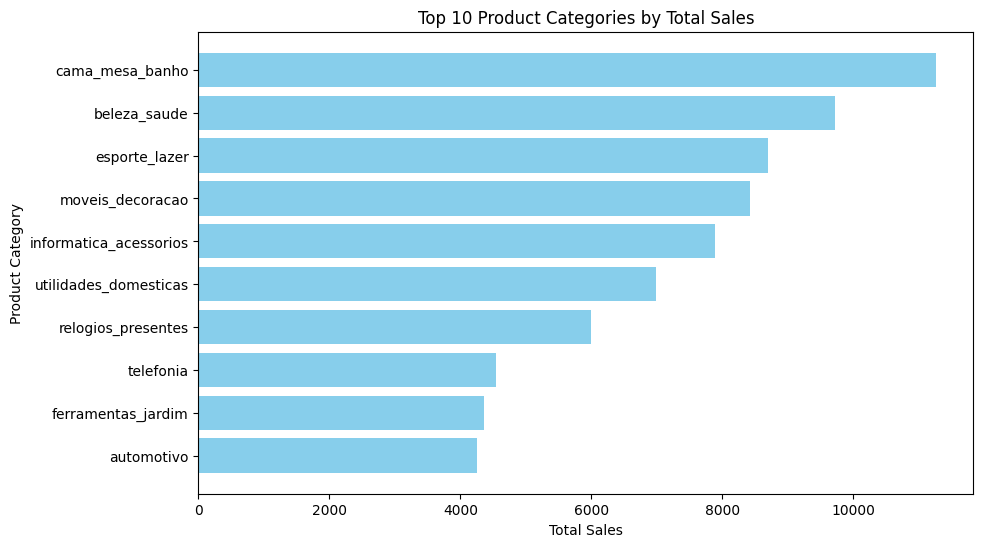

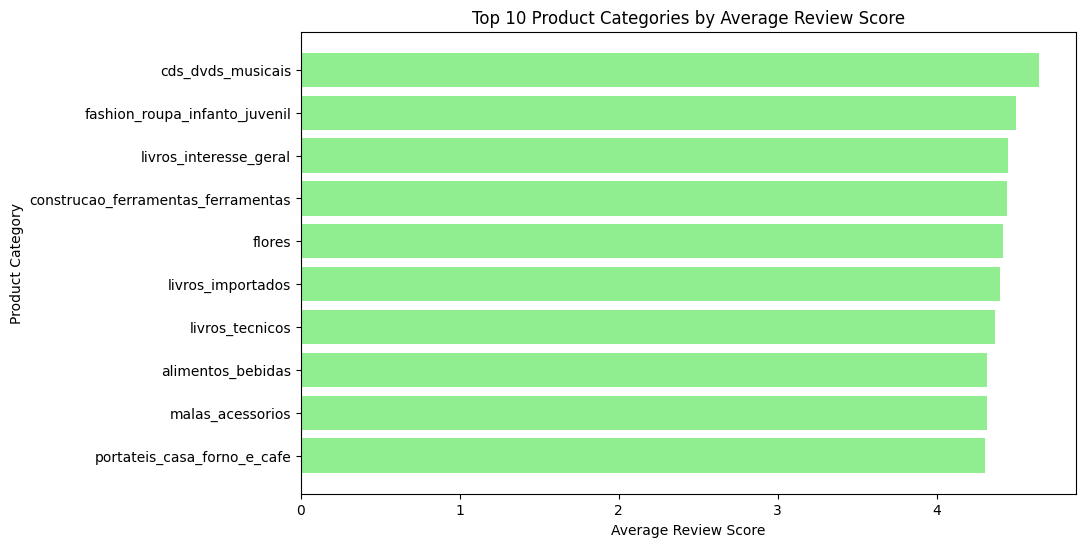

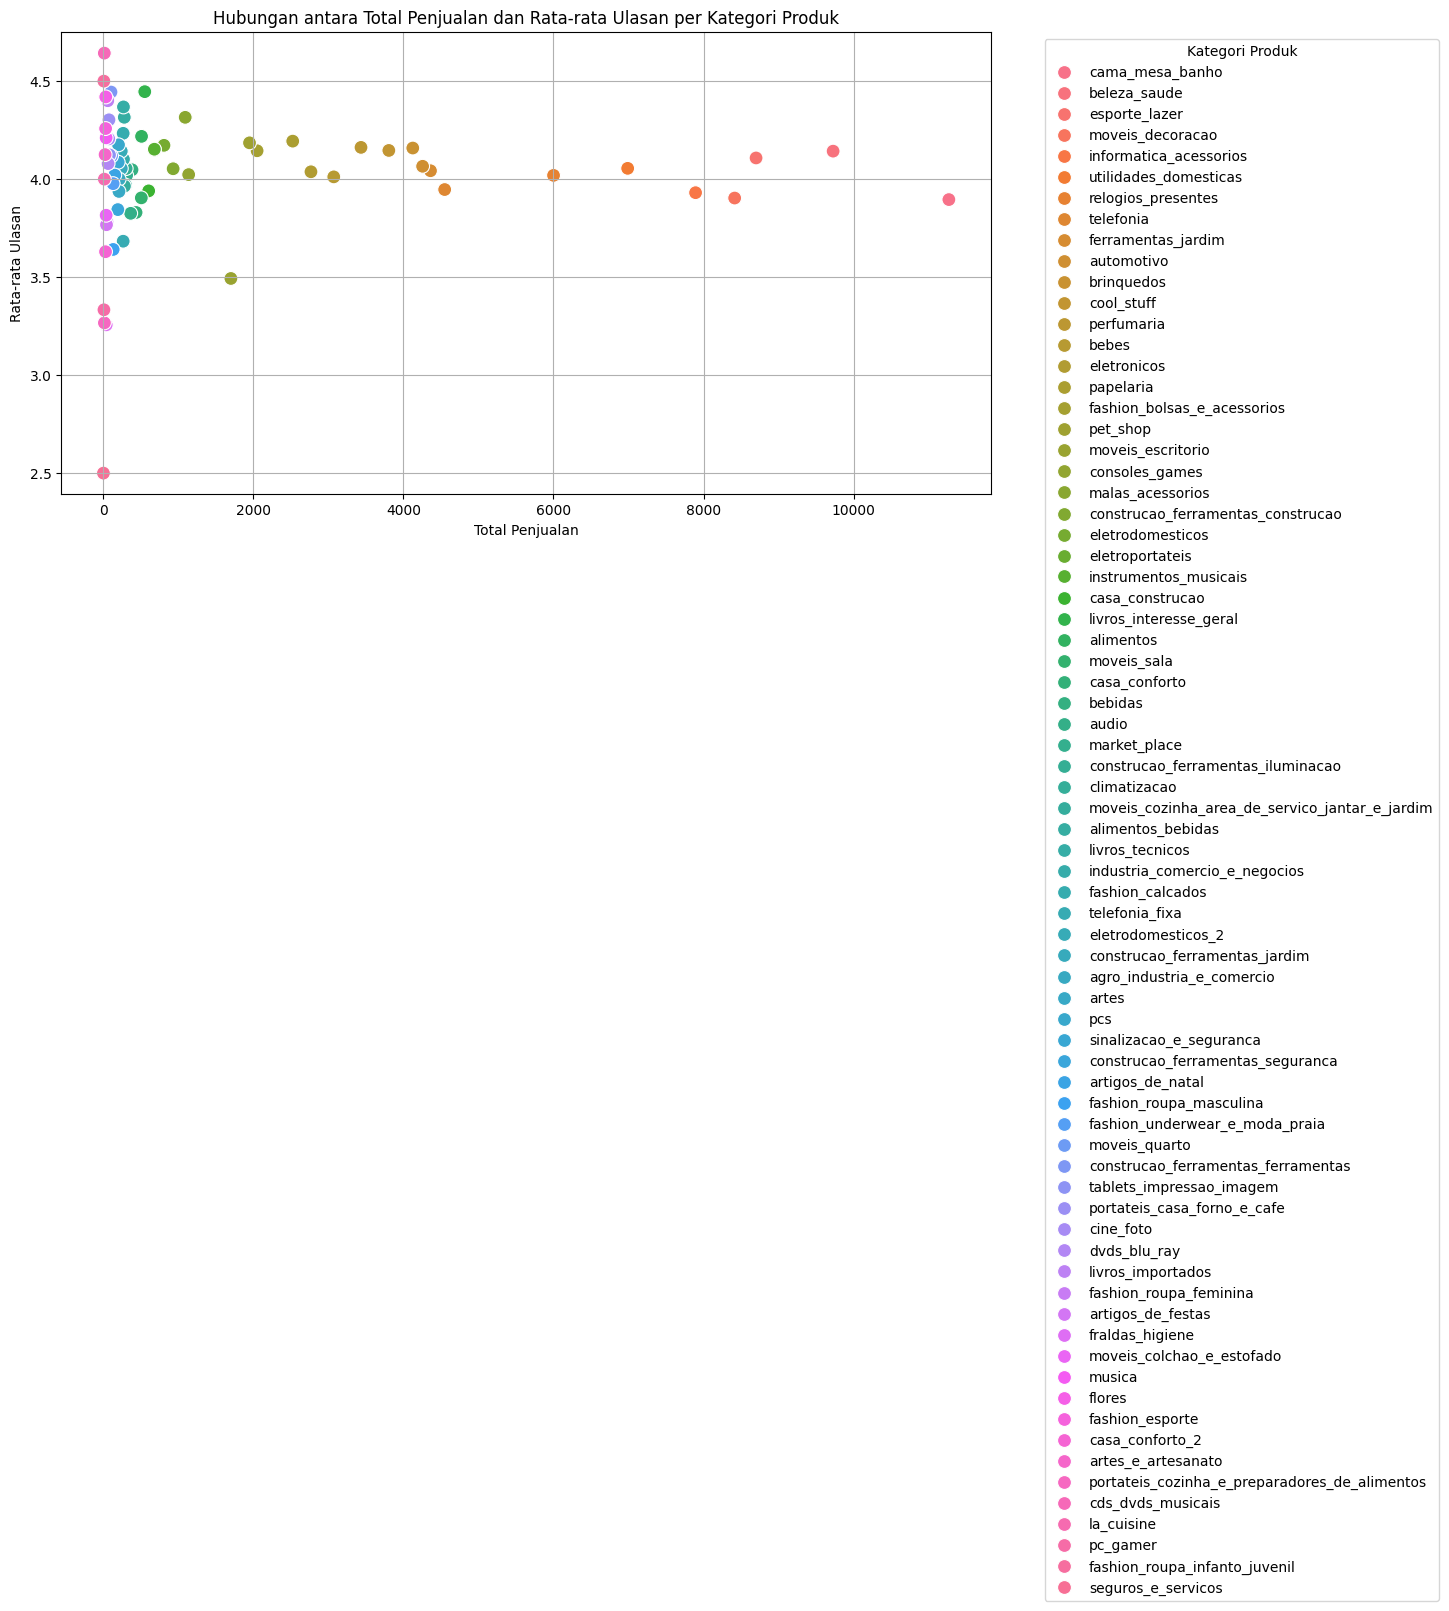

            product_category_name  total_sales  avg_review_score
0                 cama_mesa_banho        11270          3.895663
1                    beleza_saude         9727          4.142768
2                   esporte_lazer         8700          4.107986
3                moveis_decoracao         8415          3.903493
4          informatica_acessorios         7894          3.930819
..                            ...          ...               ...
68              cds_dvds_musicais           14          4.642857
69                     la_cuisine           14          4.000000
70                       pc_gamer            9          3.333333
71  fashion_roupa_infanto_juvenil            8          4.500000
72             seguros_e_servicos            2          2.500000

[73 rows x 3 columns]


In [ ]:
plt.figure(figsize=(10,6))
plt.barh(sales_per_category['product_category_name'].head(10), sales_per_category['total_sales'].head(10), color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.title('Top 10 Product Categories by Total Sales')
plt.gca().invert_yaxis()
plt.show()

# Visualisasi Kategori dengan Ulasan Terbaik
plt.figure(figsize=(10,6))
plt.barh(avg_review_per_category['product_category_name'].head(10), avg_review_per_category['avg_review_score'].head(10), color='lightgreen')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.title('Top 10 Product Categories by Average Review Score')
plt.gca().invert_yaxis()
plt.show()

combined_data = pd.merge(sales_per_category, avg_review_per_category, on='product_category_name')

# Mengurutkan berdasarkan total penjualan
combined_data = combined_data.sort_values(by='total_sales', ascending=False)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined_data, x='total_sales', y='avg_review_score', hue='product_category_name', s=100)
plt.title('Hubungan antara Total Penjualan dan Rata-rata Ulasan per Kategori Produk')
plt.xlabel('Total Penjualan')
plt.ylabel('Rata-rata Ulasan')
plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Menampilkan DataFrame hasil gabungan
print(combined_data)

### Pertanyaan 2: Bagaimana cara mengidentifikasi pelanggan yang paling berharga (VIP) berdasarkan perilaku pembelian mereka?

5 Pelanggan VIP:
                          customer_id  recency  frequency  monetary  r_score  \
66   002f90a6eb386bc43bc9ba200db31a89      444          2    307.02        5   
97   00411811e3b661e746a6e1ce1f0878ab      483          1    367.20        5   
111  004d41e9bf012c669db1a257888d85a2      415          1    307.24        5   
119  0051337a96842850e1ec728dd158f4b3      580          1    237.99        5   
132  0058ebe2dc136d918dd001968cfa5903      570          2    540.00        5   

     f_score  m_score  RFM_Score  
66         1        5         11  
97         1        5         11  
111        1        5         11  
119        1        5         11  
132        1        5         11  


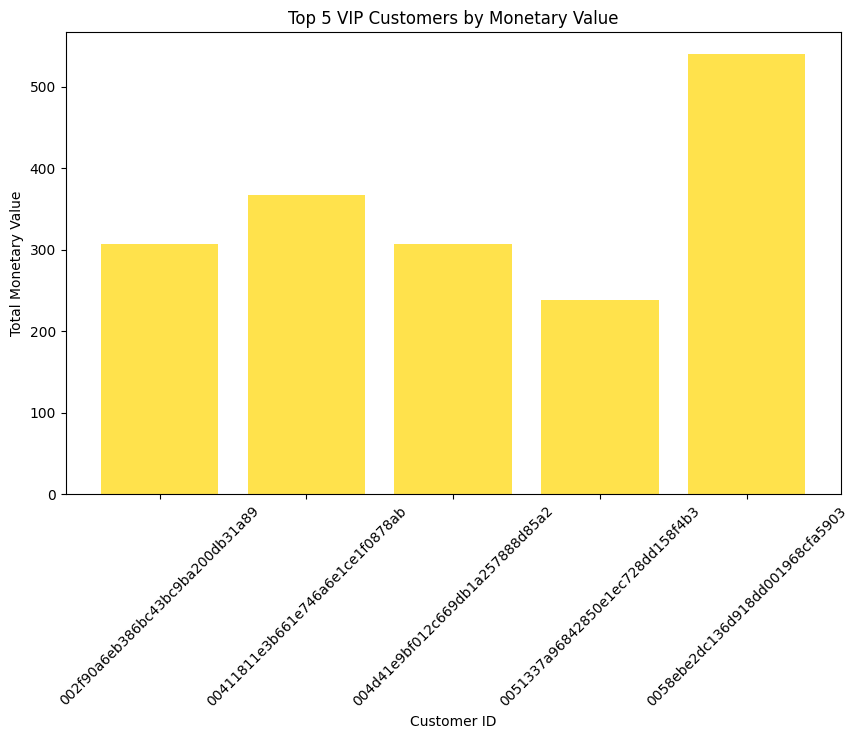

In [ ]:
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])

# Mendapatkan tanggal terakhir untuk menghitung Recency
current_date = all_data['order_purchase_timestamp'].max()

# Menghitung RFM
rfm = all_data.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'payment_value': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# Menghitung skor RFM
rfm['r_score'] = pd.qcut(rfm['recency'], 5, labels=False, duplicates='drop') + 1
rfm['f_score'] = pd.qcut(rfm['frequency'], 5, labels=False, duplicates='drop') + 1
rfm['m_score'] = pd.qcut(rfm['monetary'], 5, labels=False, duplicates='drop') + 1

# Menghitung total skor RFM
rfm['RFM_Score'] = rfm['r_score'] + rfm['f_score'] + rfm['m_score']

# Mengidentifikasi 5 pelanggan VIP
top_vip = rfm.nlargest(5, 'RFM_Score')

# Menampilkan 5 pelanggan VIP
print("5 Pelanggan VIP:")
print(top_vip)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(top_vip['customer_id'].astype(str), top_vip['monetary'], color='gold', alpha=0.7)
plt.xlabel('Customer ID')
plt.ylabel('Total Monetary Value')
plt.title('Top 5 VIP Customers by Monetary Value')
plt.xticks(rotation=45)
plt.show()

###Apakah murahnya suatu produk mempengaruhi larisnya suatu produk?

      product_category_name  total_sales  payment_value
26764    relogios_presentes          105          99.90
54252      moveis_decoracao           65          69.90
48269       cama_mesa_banho           59         102.03
48279       cama_mesa_banho           57         105.28
6693           beleza_saude           51          31.77
54253      moveis_decoracao           46          82.33
54254      moveis_decoracao           45          82.98
21003    ferramentas_jardim           44          77.57
17880    ferramentas_jardim           44          77.57
26644    ferramentas_jardim           37          77.57


<ipython-input-74-62df28599b30>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='product_category_name', data=top_products, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarni

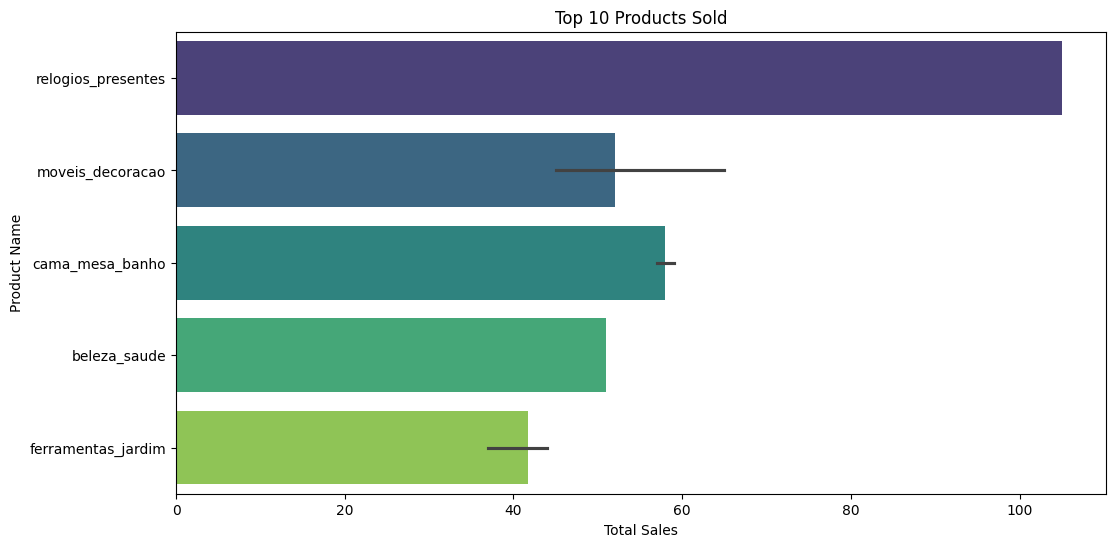

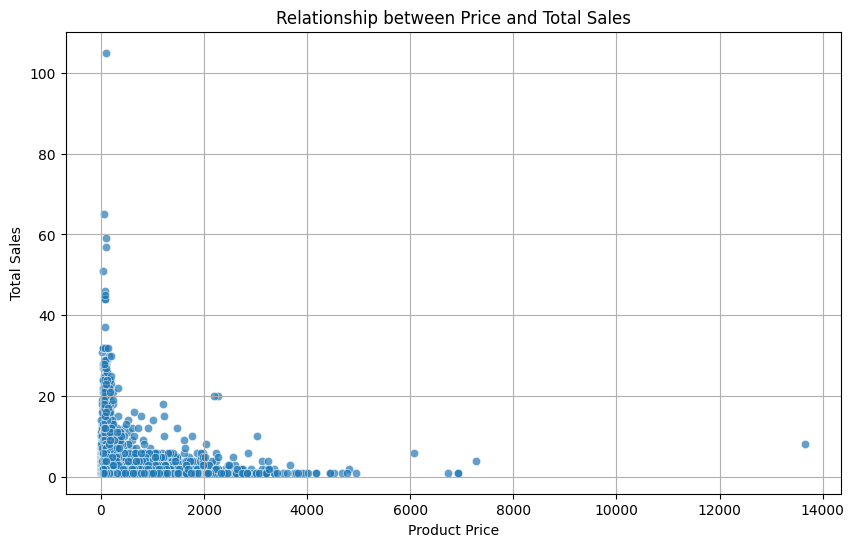

In [ ]:
product_sales = all_data.groupby(['product_id', 'product_category_name', 'payment_value']).agg(
    total_sales=('order_id', 'count')
).reset_index()


top_products = product_sales.sort_values(by='total_sales', ascending=False).head(10)
print(top_products[['product_category_name', 'total_sales', 'payment_value']])

# Visualisasi penjualan produk
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='product_category_name', data=top_products, palette='viridis')
plt.title('Top 10 Products Sold')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

# Visualisasi hubungan antara harga dan jumlah penjualan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_sales, x='payment_value', y='total_sales', alpha=0.7)
plt.title('Relationship between Price and Total Sales')
plt.xlabel('Product Price')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

**Insight:**
- semakin besar harga produk, semakin produk cenderung memiliki penjualan yang rendah
- VIP dapat ditentukan dengan menghitung recency,frequency dan juga monetary
- produk dengan review tertinggi kebanyakan adalah produk dengan total terjual yang sedikit

## Conclusion

- Conclution pertanyaan 1
Product dengan total penjualan terbanyak adalah cama_mesa_banho, sedangkan product dengan ulasan terbaik adalah cvd_dvd_musicais. Barang dengan total penjualan yang banyak tidak menjamin barang tersebut memiliki ulasan yang tinggi, malah barang dengan rating tertinggi kebanyakan diambil oleh barang-barang dengan total penjualan sedikit.


- Conclution pertanyaan 2
Pada pertanyaan kedua, menggunakan metode rfm, kita bisa memperhitungkan VIP dengan menghitung skor frekuensi mereka berbelanja, berapa banyak uang yang mereka keluarkan, dan kapan terakhir kali mereka berbelanja. Bisa kita lihat dari 5 orang teratas yang berbelana, yang paling sedikit mendapat 200+skor dan yang tertinggi sampai 500+skor

- Conclution pertanyaan 3
product category dengan penjualan terbanyak adalah relogios_prasentes, hubungan antara harga produk dengan jumlah terjualnya produk sangat berkaitan, karena bisa terlihat, semakin besar harga produk, total penjualannya cenderung menurun

## Analisis Lanjutan (Opsional)